In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve,auc
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
df = pd.read_csv('hate_crime.csv')
print(df)

        incident_id  data_year        ori    pug_agency_name pub_agency_unit  \
0                43       1991  AR0350100         Pine Bluff             NaN   
1                44       1991  AR0350100         Pine Bluff             NaN   
2                45       1991  AR0600300  North Little Rock             NaN   
3                46       1991  AR0600300  North Little Rock             NaN   
4                47       1991  AR0670000             Sevier             NaN   
...             ...        ...        ...                ...             ...   
253771      1513747       2023  WY0190100        Green River             NaN   
253772      1517229       2023  WY0130100             Casper             NaN   
253773      1517231       2023  WY0110100           Cheyenne             NaN   
253774      1519468       2023  WY0150000               Park             NaN   
253775      1519469       2023  WY0110100           Cheyenne             NaN   

       agency_type_name state_abbr stat

In [ ]:
df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S


In [2]:
# Check column names to confirm the year column name
print(df.columns)

# Filter the dataset for years between 2013 and 2023
data= df[(df['data_year'] >= 2013) & (df['data_year'] <= 2023)]
print(data)


Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')
        incident_id  data_year        ori pug_agency_name pub_agency_unit  \
163054       169133       2013  AK0010100       Anchorage             NaN   
163055       169134       2013  AK0010100       Anchorage             NaN   
163056       169135       2013  AK0010100       Anchorage             NaN   
163057       169136       2013  AK0010100       Anchorage             NaN  

In [3]:
data.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
163054,169133,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Not Specified,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
163055,169134,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Intimidation,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual,S,S
163056,169135,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
163057,169136,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
163058,169137,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S


In [4]:
#concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90722 entries, 163054 to 253775
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   90722 non-null  int64  
 1   data_year                     90722 non-null  int64  
 2   ori                           90722 non-null  object 
 3   pug_agency_name               90722 non-null  object 
 4   pub_agency_unit               3325 non-null   object 
 5   agency_type_name              90722 non-null  object 
 6   state_abbr                    90722 non-null  object 
 7   state_name                    90722 non-null  object 
 8   division_name                 90722 non-null  object 
 9   region_name                   90722 non-null  object 
 10  population_group_code         90055 non-null  object 
 11  population_group_description  90055 non-null  object 
 12  incident_date                 90722 non-null  object 
 13  

In [5]:
#summary of statistics pertaining to the DataFrame columns
data.describe()

,incident_id,data_year,adult_victim_count,juvenile_victim_count,total_offender_count,adult_offender_count,juvenile_offender_count,victim_count,total_individual_victims
count,9.072200e+04,90722.000000,76401.000000,73764.000000,90722.000000,66919.000000,66912.000000,90722.000000,85598.000000
mean,9.850001e+05,2018.850698,0.811233,0.116371,0.892011,0.681735,0.140931,0.981669,1.044522
std,5.975892e+05,3.134821,1.111715,0.519577,0.918794,0.821274,0.554040,0.318596,1.202721
min,1.630960e+05,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.858142e+05,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.447360e+06,2019.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.475754e+06,2022.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.522894e+06,2023.000000,146.000000,60.000000,60.000000,60.000000,20.000000,5.000000,146.000000


In [6]:
print ("Number of rows in the dataset  : " ,data.shape[0])
print ("Number of Columns in the dataset : " ,data.shape[1])
print ("Number of Features : \n" ,data.columns.tolist(), "\n")
print ("Unique values :  \n",data.nunique())

Number of rows in the dataset  :  90722
Number of Columns in the dataset :  28
Number of Features : 
 ['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias'] 

Unique values :  
 incident_id                     90722
data_year                          11
ori                              8110
pug_agency_name                  5574
pub_agency_unit                   561
agency_type_name                    8
state_abbr                         53
state_name                         53
division_name                      11
reg

In [7]:
# geting to know which year has more accident
data.value_counts('data_year')

,count
data_year,
2023,11858
2022,11766
2021,11014
2020,9958
2019,7869
2017,7327
2018,7176
2016,6270
2013,6044


In [ ]:
data.duplicated().sum()  # Check for duplicate rows
data.isnull().sum()  # Count missing values in each column

,0
incident_id,0
data_year,0
ori,0
pug_agency_name,0
pub_agency_unit,87397
agency_type_name,0
state_abbr,0
state_name,0
division_name,0
region_name,0


In [8]:
data['offender_race'].fillna('Unknown')
data['offender_race'].isnull().sum()  # Verify no missing values remain

np.int64(0)

In [9]:
# List of columns to be removed from the DataFrame.
columns_for_removal = ['offender_ethnicity','total_individual_victims', 'adult_offender_count',
                       'juvenile_offender_count', 'adult_victim_count',
                       'juvenile_victim_count','division_name', 'multiple_offense', 'multiple_bias', 'ori','pub_agency_unit']

# Remove specified columns using the drop() method.
# axis=1 indicates that we are dropping columns (not rows).
cleaned = data.drop(columns_for_removal, axis=1)

# Display the first few rows of the modified DataFrame
# to confirm that the columns have been removed.
cleaned.head()  # Now cleaned should be a DataFrame and have a head() method

,incident_id,data_year,pug_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types
163054,169133,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-02-15,1,Unknown,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163055,169134,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-03-01,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual
163056,169135,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-07,4,White,1,Burglary/Breaking & Entering,Residence/Home,Anti-Black or African American,Individual
163057,169136,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-17,1,White,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163058,169137,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-20,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual


In [10]:
# Convert the 'incident_date' column to datetime objects using pd.to_datetime.
data.loc[:, 'incident_date'] = pd.to_datetime(data['incident_date'])


In [11]:
new_names = {
    'incident_id': 'INCIDENT_ID', 'data_year': 'DATA_YEAR',
    'pub_agency_name': 'PUB_AGENCY_NAME', 'pug_agency_name': 'PUG_AGENCY_NAME',
    'agency_type_name': 'AGENCY_TYPE_NAME', 'state_abbr': 'STATE_ABBR',
    'state_name': 'STATE_NAME', 'region_name': 'REGION_NAME',
    'population_group_code': 'POPULATION_GROUP_CODE',
    'population_group_description': 'POPULATION_GROUP_DESC',
    'incident_date': 'INCIDENT_DATE', 'total_offender_count': 'TOTAL_OFFENDER_COUNT',
    'offender_race': 'OFFENDER_RACE', 'victim_count': 'VICTIM_COUNT',
    'offense_type': 'OFFENSE_NAME', 'offense_name': 'OFFENSE_NAME',
    'location_type': 'LOCATION_NAME', 'location_name': 'LOCATION_NAME',
    'bias_desc': 'BIAS_DESC', 'bias_disc': 'BIAS_DESC',
    'victim_types': 'VICTIM_TYPES'
}

cleaned.rename(columns=new_names, inplace=True)
cleaned.head()

,INCIDENT_ID,DATA_YEAR,PUG_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
163054,169133,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-02-15,1,Unknown,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163055,169134,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-03-01,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual
163056,169135,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-07,4,White,1,Burglary/Breaking & Entering,Residence/Home,Anti-Black or African American,Individual
163057,169136,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-17,1,White,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163058,169137,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-20,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual


In [12]:
# Group by year and count unique bias descriptions
bias_types_by_year = cleaned.groupby('DATA_YEAR')['BIAS_DESC'].nunique().reset_index()

# Rename columns for clarity
bias_types_by_year.columns = ['Year', 'Unique_Bias_Types']

# Display the table
print(bias_types_by_year)


    Year  Unique_Bias_Types
0   2013                 32
1   2014                 40
2   2015                 40
3   2016                 73
4   2017                 79
5   2018                 69
6   2019                156
7   2020                172
8   2021                147
9   2022                176
10  2023                175


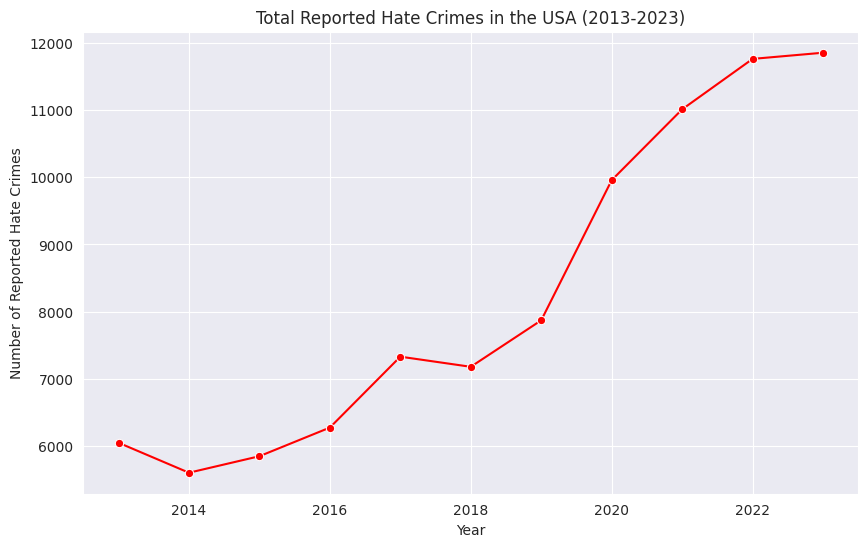

In [13]:
# Count total bias-related incidents by year
bias_counts_by_year = cleaned.groupby('DATA_YEAR')['BIAS_DESC'].count().reset_index()
bias_counts_by_year.columns = ['Year', 'Total_Hate_Crimes']

# Plotting
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.lineplot(data=bias_counts_by_year, x='Year', y='Total_Hate_Crimes', color='red', marker='o')
plt.title("Total Reported Hate Crimes in the USA (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Reported Hate Crimes")
plt.show()


In [15]:
# different types of hate crimes in 2013-2023
cleaned['OFFENSE_NAME'].value_counts().head(10)

,count
OFFENSE_NAME,
Intimidation,24709
Destruction/Damage/Vandalism of Property,23812
Simple Assault,19406
Aggravated Assault,9405
All Other Larceny,1813
Robbery,1421
Burglary/Breaking & Entering,1228
Drug/Narcotic Violations,874
Destruction/Damage/Vandalism of Property;Intimidation,589


In [16]:
# percentage proportion
cleaned['OFFENSE_NAME'].value_counts().head(10)/len(cleaned['OFFENSE_NAME'])

,count
OFFENSE_NAME,
Intimidation,0.272360
Destruction/Damage/Vandalism of Property,0.262472
Simple Assault,0.213906
Aggravated Assault,0.103668
All Other Larceny,0.019984
Robbery,0.015663
Burglary/Breaking & Entering,0.013536
Drug/Narcotic Violations,0.009634
Destruction/Damage/Vandalism of Property;Intimidation,0.006492


In [17]:
# top four crime categories funtion
top_four = ['Destruction/Damage/Vandalism of Property','Intimidation','Simple Assault','Aggravated Assault']
def crime_check(crime):
    if crime in top_four:
        return crime
    else:
        return 'Robbery/B&E/Other'

In [18]:
# creating a dataframe for the same function
most_common_hate_crimes = cleaned
most_common_hate_crimes['OFFENSE_NAME'] = most_common_hate_crimes['OFFENSE_NAME'].apply(crime_check)

In [19]:
most_common_hate_crimes['OFFENSE_NAME'].value_counts()

,count
OFFENSE_NAME,
Intimidation,24709
Destruction/Damage/Vandalism of Property,23812
Simple Assault,19406
Robbery/B&E/Other,13390
Aggravated Assault,9405


In [20]:
# now aggregating the anti-lesbian, gay, bisexual, transgender, anti-gay(male), anti-lesbian(female) columns into one anti-LGBT
# for ease as prejudice
lgbt_BIAS_DESC = ['Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 'Anti-Gay (Male)', 'Anti-Lesbian (Female)']
def anti_lgbt_BIAS_DESC(BIAS_DESC):
    if BIAS_DESC in lgbt_BIAS_DESC:
        return "Anti-LGBT"
    else:
        return BIAS_DESC

In [21]:
most_common_hate_crimes['BIAS_DESC'] = most_common_hate_crimes['BIAS_DESC'].apply(anti_lgbt_BIAS_DESC)

In [22]:
most_common_hate_crimes['BIAS_DESC'].value_counts()

,count
BIAS_DESC,
Anti-Black or African American,26574
Anti-LGBT,14612
Anti-Jewish,10136
Anti-White,8766
Anti-Hispanic or Latino,5637
...,...
Anti-Female;Anti-Other Christian,1
Anti-American Indian or Alaska Native;Anti-Black or African American;Anti-Female;Anti-Hispanic or Latino,1
Anti-Asian;Anti-Bisexual,1


Text(0.5, 1.0, 'Total Hate Crimes per Offense Name (2013-2023)')

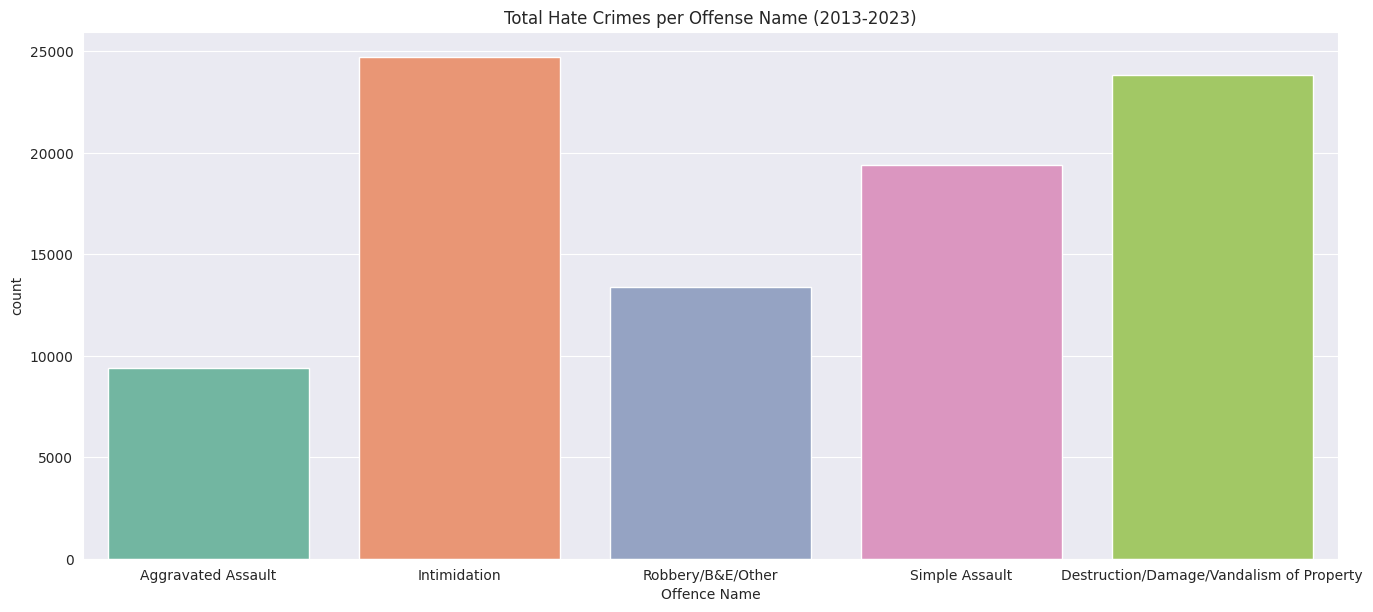

In [23]:
# total crime per offence as divided by categories
plt.figure(figsize=(14,6))
sns.countplot(data=cleaned, x='OFFENSE_NAME', hue='OFFENSE_NAME', palette='Set2', legend=False)
plt.tight_layout()
plt.xlabel('Offence Name')
plt.title('Total Hate Crimes per Offense Name (2013-2023)')

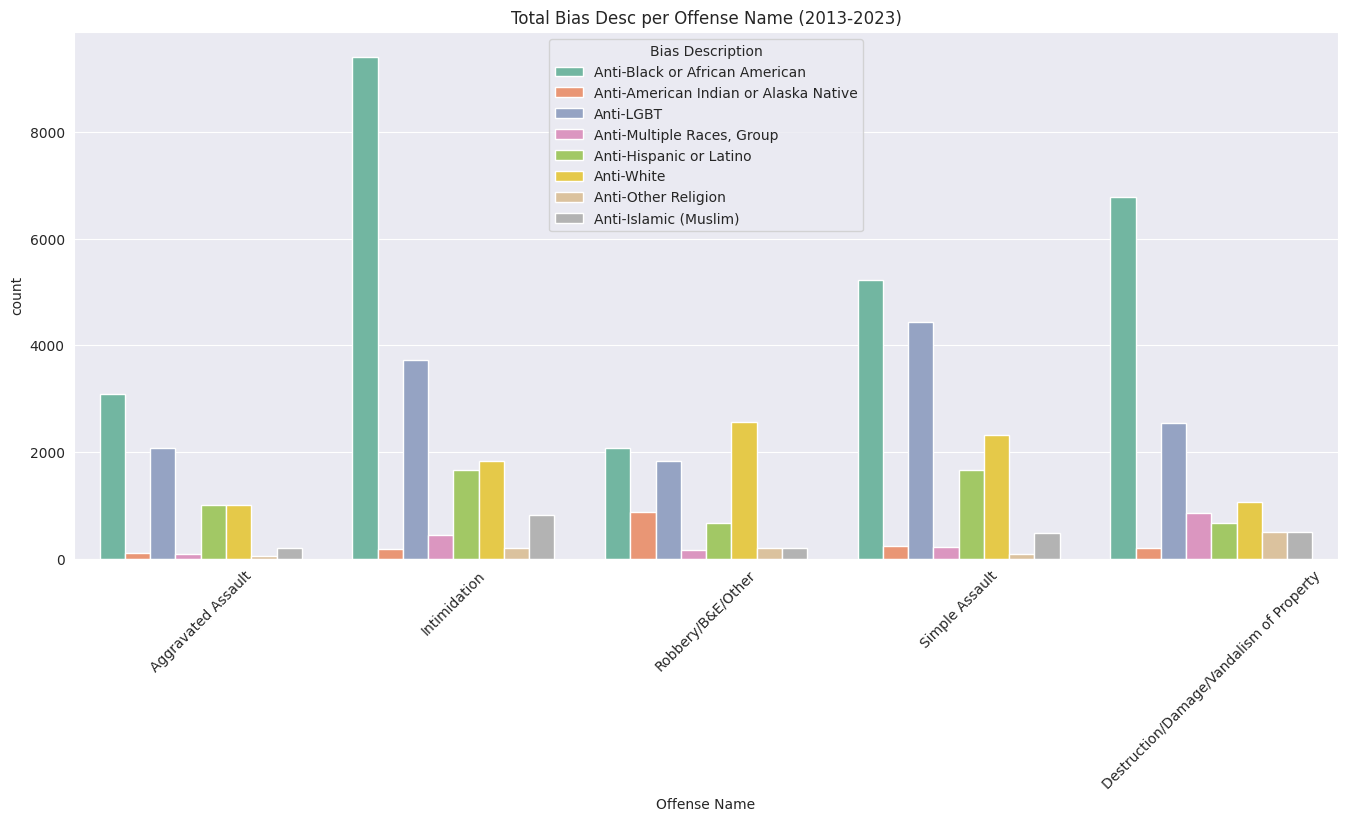

In [24]:
#visualization of bias desc per offence name
plt.figure(figsize=(14,6))


# first 8 unique bias descriptions
top_8_bias_desc = cleaned['BIAS_DESC'].unique()[:8]

# Filter dataset
filtered_data = cleaned[cleaned['BIAS_DESC'].isin(top_8_bias_desc)]

# Create the bar chart
sns.countplot(data=filtered_data, x='OFFENSE_NAME', hue='BIAS_DESC', palette='Set2')

plt.tight_layout()
plt.title("Total Bias Desc per Offense Name (2013-2023)")
plt.xlabel("Offense Name")
plt.xticks(rotation=45)
plt.legend(title="Bias Description")

plt.show()

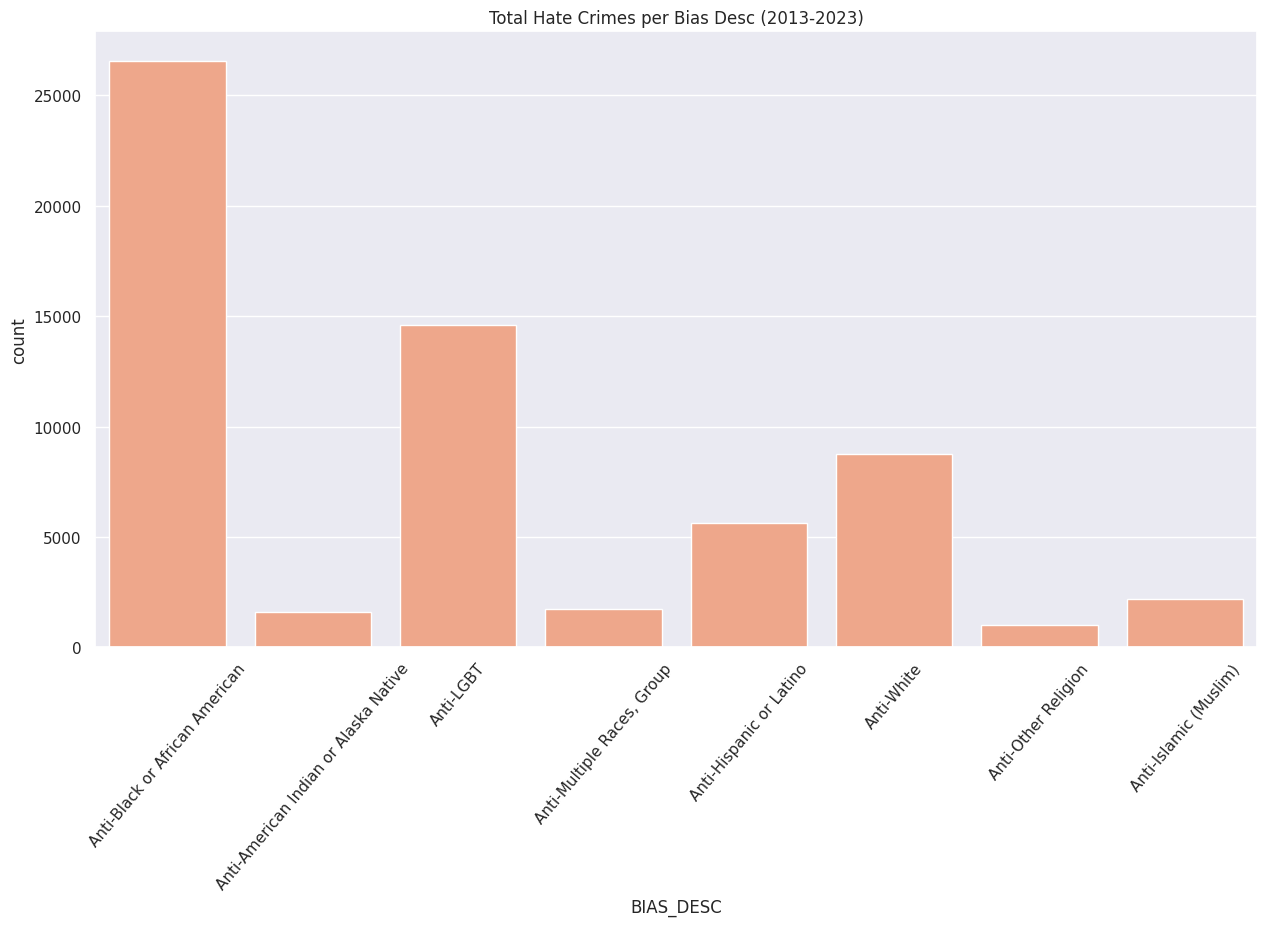

In [26]:
# Hate crime per bias desc
plt.figure(figsize=(15,8))
sns.set_context('notebook', font_scale=1)

# first 8 unique bias desc
top_8_bias_desc = cleaned['BIAS_DESC'].unique()[:8]

# only rows with these 8 bias descriptions
filtered_data = cleaned[cleaned['BIAS_DESC'].isin(top_8_bias_desc)]

# Plotting
sns.countplot(data=filtered_data, x='BIAS_DESC', color='#FFA07A')
plt.xticks(rotation=50)
plt.title("Total Hate Crimes per Bias Desc (2013-2023)")
plt.xlabel("BIAS_DESC")
plt.show()


Top 10 locations with the highest hate crime counts:
LOCATION_NAME
Residence/Home                        25372
Highway/Road/Alley/Street/Sidewalk    15895
Other/Unknown                          9391
Parking/Drop Lot/Garage                5120
School-Elementary/Secondary            4562
Church/Synagogue/Temple/Mosque         3423
Restaurant                             2350
Park/Playground                        2282
School-College/University              2221
Commercial/Office Building             1877
Name: count, dtype: int64


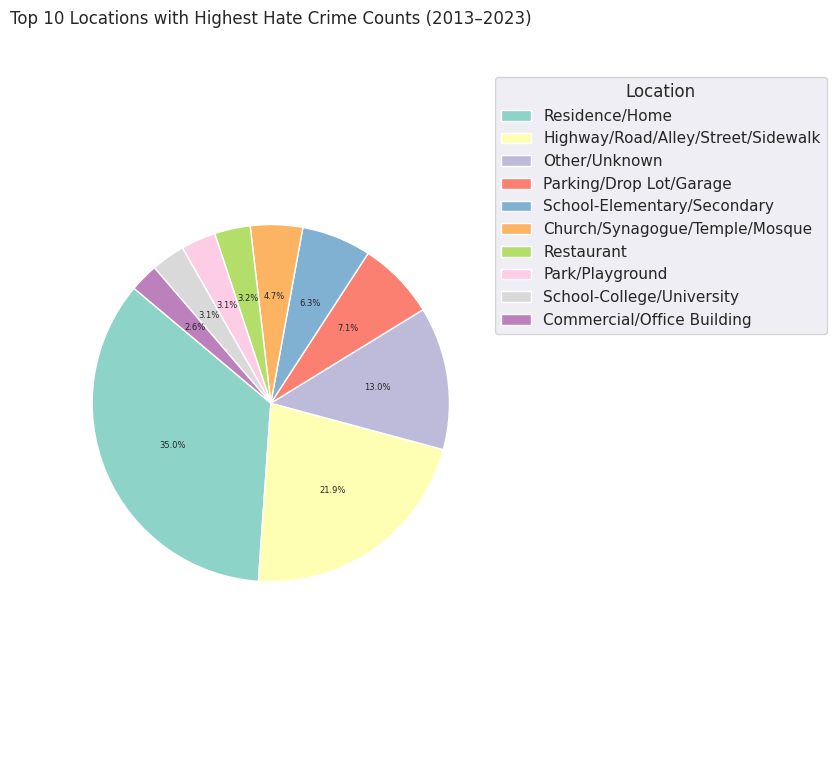

In [27]:
# Select relevant columns
columns_to_use = ['LOCATION_NAME', 'BIAS_DESC']
data_filtered = cleaned[columns_to_use].dropna()

# Top 10 locations with highest total hate crime counts
top_10_locations = (
    data_filtered['LOCATION_NAME']
    .value_counts()
    .head(10)
)

print("Top 10 locations with the highest hate crime counts:")
print(top_10_locations)

# Define colors using a colormap for better distinction
colors = plt.cm.Set3(range(10))

# Plot pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    top_10_locations,
    labels=None,  # No labels on the pie
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)
for autotext in autotexts:
    autotext.set_fontsize(6)

# Add legend for category labels
plt.legend(patches, top_10_locations.index, title="Location", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title('Top 10 Locations with Highest Hate Crime Counts (2013–2023)')
plt.axis('equal')  # Draw pie as a circle
plt.tight_layout()
plt.show()



Decision Tree:
Accuracy: 0.5202

Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.42      0.27      0.33      3102
                     Other/Unknown       0.71      0.55      0.62      1848
           Parking/Drop Lot/Garage       0.67      0.00      0.00      1066
                    Residence/Home       0.51      0.84      0.64      5128
       School-Elementary/Secondary       0.52      0.10      0.17       924

                          accuracy                           0.52     12068
                         macro avg       0.57      0.35      0.35     12068
                      weighted avg       0.53      0.52      0.46     12068



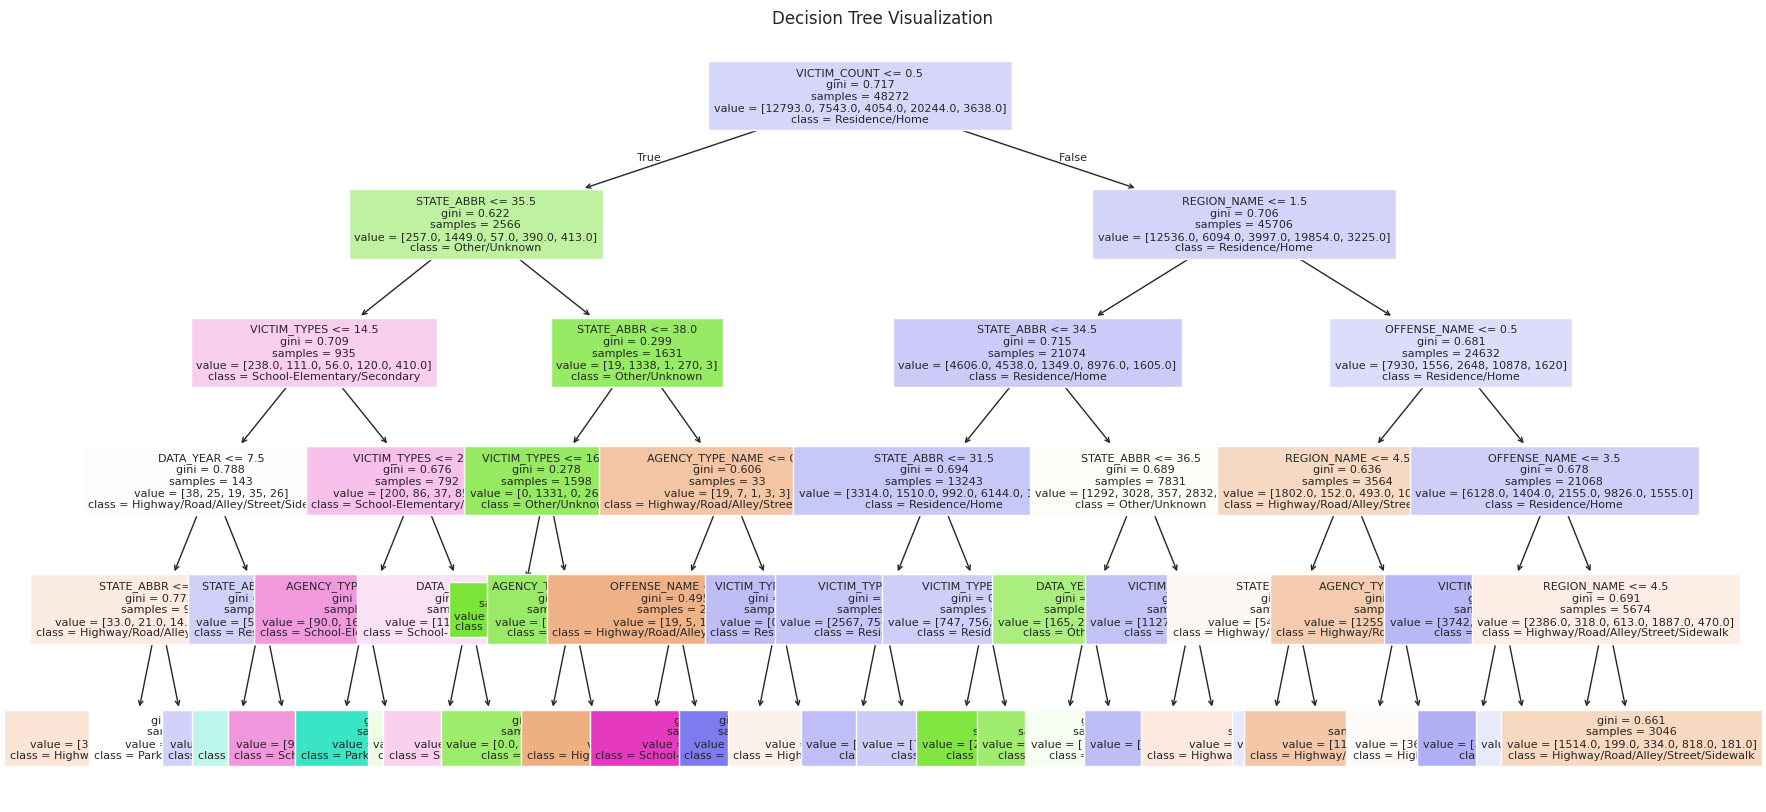

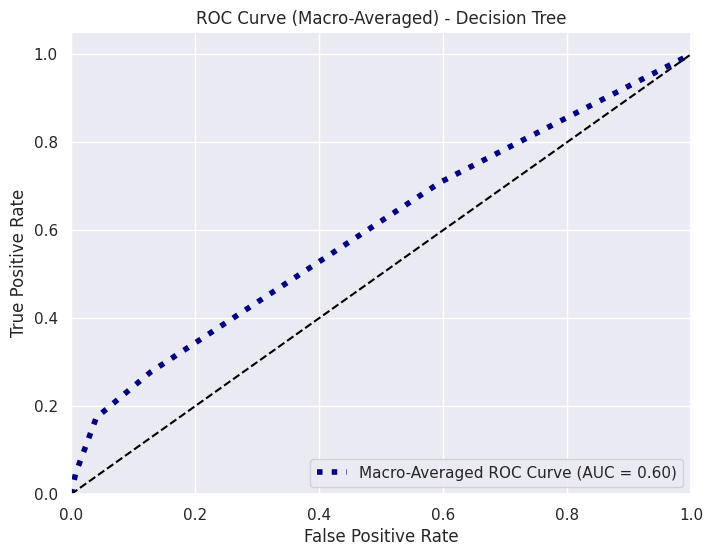


Random Forest:
Accuracy: 0.5550

Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.51      0.40      0.45      3102
                     Other/Unknown       0.76      0.55      0.64      1848
           Parking/Drop Lot/Garage       0.50      0.00      0.01      1066
                    Residence/Home       0.53      0.83      0.65      5128
       School-Elementary/Secondary       0.56      0.22      0.31       924

                          accuracy                           0.56     12068
                         macro avg       0.57      0.40      0.41     12068
                      weighted avg       0.56      0.56      0.51     12068



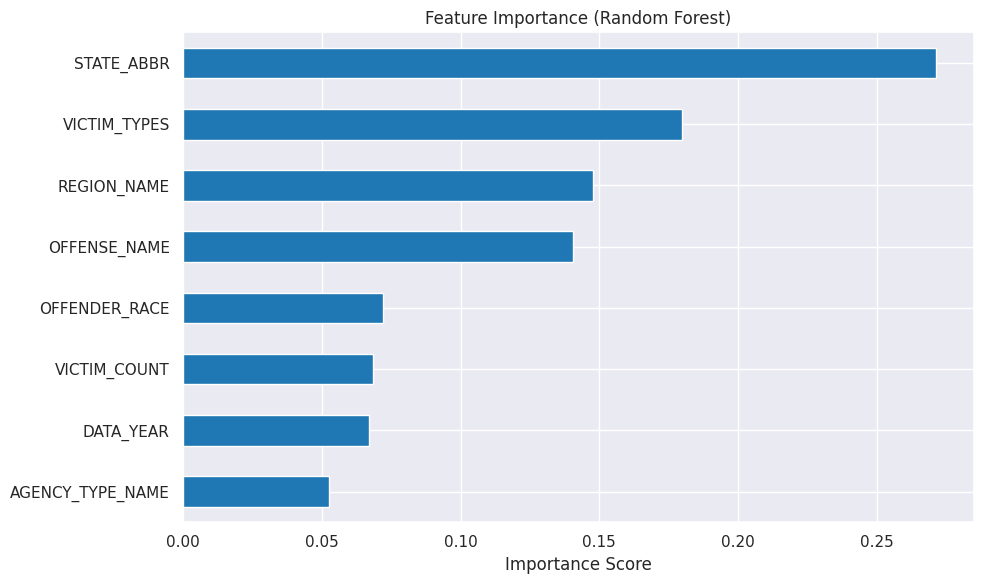

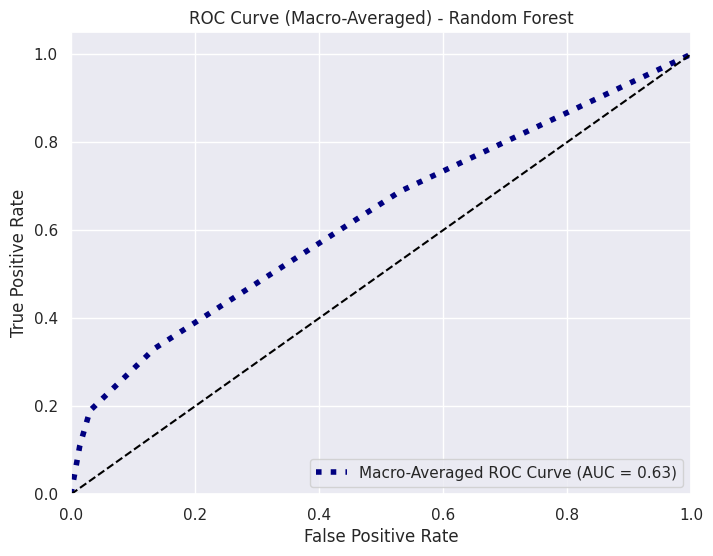


XGBoost:
Accuracy: 0.5618

Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.50      0.46      0.48      3102
                     Other/Unknown       0.74      0.56      0.64      1848
           Parking/Drop Lot/Garage       0.38      0.02      0.03      1066
                    Residence/Home       0.55      0.79      0.65      5128
       School-Elementary/Secondary       0.56      0.29      0.38       924

                          accuracy                           0.56     12068
                         macro avg       0.55      0.42      0.43     12068
                      weighted avg       0.55      0.56      0.53     12068



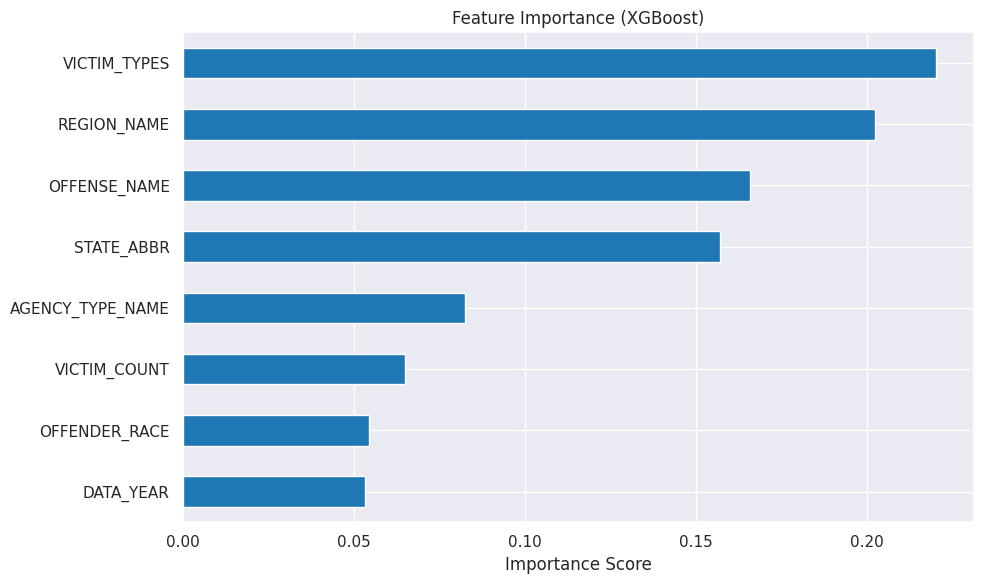

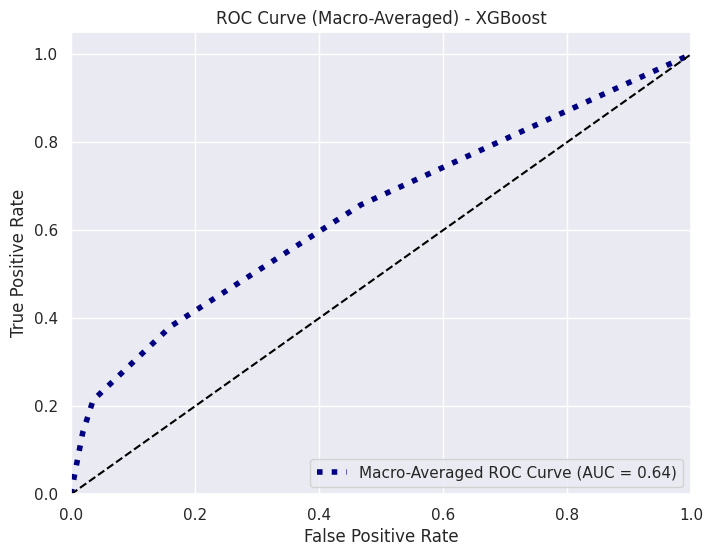

In [28]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test, label_encoder):
    """
    Trains and evaluates Decision Tree, Random Forest, and XGBoost classifiers,
    printing accuracy, classification reports, generating feature importance plots,
    and plotting ROC curves for multi-class classification.
    """
    results = {}

    # Binarize the labels for multi-class ROC computation
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)

        # Classification Report
        report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

        # Store results
        results[name] = {"Accuracy": acc, "Classification Report": report}

        # Print results
        print(f"\n{name}:\nAccuracy: {acc:.4f}\n")
        print(f"Classification Report:\n{report}")

        # Feature Importance (skip for Decision Tree visualization)
        if name != "Decision Tree":
            importances = pd.Series(model.feature_importances_, index=X_train.columns)
            importances.sort_values().plot(kind='barh', figsize=(10, 6))
            plt.title(f"Feature Importance ({name})")
            plt.xlabel("Importance Score")
            plt.tight_layout()
            plt.show()

        # Plot Decision Tree
        if name == "Decision Tree":
            plt.figure(figsize=(20, 10))
            plot_tree(model, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_, fontsize=8)
            plt.title("Decision Tree Visualization")
            plt.show()

        # Compute ROC Curve (Macro-Averaged)
        y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))
        fpr, tpr, roc_auc = {}, {}, {}

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= n_classes
        # Fix: Separate the assignment of fpr["macro"] and tpr["macro"]
        fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.figure(figsize=(8, 6))
        plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-Averaged ROC Curve (AUC = {roc_auc["macro"]:.2f})',
                 color='navy', linestyle=':', linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Macro-Averaged) - {name}')
        plt.legend(loc="lower right")
        plt.show()

    return results

target_col = 'LOCATION_NAME'

# Top 5 most frequent locations
top_locations = cleaned[target_col].value_counts().nlargest(5).index
cleaned = cleaned[cleaned[target_col].isin(top_locations)]

# Feature selection
feature_cols = ['OFFENSE_NAME', 'REGION_NAME', 'DATA_YEAR', 'AGENCY_TYPE_NAME',
                'VICTIM_TYPES', 'OFFENDER_RACE', 'STATE_ABBR', 'VICTIM_COUNT']

# Drop missing values
cleaned = cleaned[feature_cols + [target_col]].dropna()

# Encode categorical features
X = cleaned[feature_cols].apply(LabelEncoder().fit_transform)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cleaned[target_col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Run evaluation
results = train_and_evaluate(models, X_train, X_test, y_train, y_test, label_encoder)

In [ ]:
# Assuming 'cleaned' is your DataFrame
# Target column and feature selection
target_col = 'LOCATION_NAME'
feature_cols = ['OFFENSE_NAME', 'REGION_NAME', 'DATA_YEAR', 'AGENCY_TYPE_NAME',
                'VICTIM_TYPES', 'OFFENDER_RACE', 'STATE_ABBR', 'VICTIM_COUNT']

# Filter top 5 locations & drop missing values
top_locations = cleaned[target_col].value_counts().nlargest(5).index
cleaned = cleaned[cleaned[target_col].isin(top_locations)]
cleaned = cleaned[feature_cols + [target_col]].dropna()

# Encode categorical features
X = cleaned[feature_cols].apply(LabelEncoder().fit_transform)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cleaned[target_col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models & hyperparameter grids
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2],
        "criterion": ["gini"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 150],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0]
    }
}

# Train & evaluate models with GridSearchCV
best_models = {}
for name, model in {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Save best model
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate best model
    y_pred = best_models[name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"\n{name} Evaluation ")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

# Saving all models into one file
joblib.dump(best_models, "all_models.pkl")
print("\n All models saved in all_models.pkl")


Tuning Decision Tree...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Decision Tree Evaluation 
Accuracy: 0.5538
Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.51      0.42      0.46      3102
                     Other/Unknown       0.74      0.55      0.63      1848
           Parking/Drop Lot/Garage       0.19      0.01      0.02      1066
                    Residence/Home       0.54      0.80      0.65      5128
       School-Elementary/Secondary       0.53      0.23      0.32       924

                          accuracy                           0.55     12068
                         macro avg       0.50      0.40      0.42     12068
                      weighted avg       0.53      0.55      0.52     12068


Tuning Random Forest...
Fitting 3 fol

In [ ]:
# 🔹 Load all models from one file for evaluation
loaded_models = joblib.load("all_models.pkl")
print("\n All models")

# Evaluate loaded models
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"\n {name} (Loaded Model) ")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


 All models

 Decision Tree (Loaded Model) 
Accuracy: 0.5538
Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.51      0.42      0.46      3102
                     Other/Unknown       0.74      0.55      0.63      1848
           Parking/Drop Lot/Garage       0.19      0.01      0.02      1066
                    Residence/Home       0.54      0.80      0.65      5128
       School-Elementary/Secondary       0.53      0.23      0.32       924

                          accuracy                           0.55     12068
                         macro avg       0.50      0.40      0.42     12068
                      weighted avg       0.53      0.55      0.52     12068


 Random Forest (Loaded Model) 
Accuracy: 0.5559
Classification Report:
                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.51      0.41      0.45      3102
   